Задача: Прогнозирование ухода клиентов телекоммуникационной компании.

Мотивация для выбора данной задачи: работа с провайдерами, поставки телекоммуникационного оборудования компаниям, интерес к данной сфере, личный и коммереческий
Описание задачи:
Телекоммуникационная компания хочет спрогнозировать, какие клиенты могут уйти в ближайшее время. Это позволит компании предпринять превентивные меры, такие как персональные предложения или повышение качества обслуживания, чтобы сохранить клиентов.

Цель:
Разработать модель классического машинного обучения, которая будет прогнозировать вероятность ухода клиента на основе исторических данных.

Выбор датасета:
Для этой задачи возьму датасет Telco Customer Churn, который есть в общем доступен на Kaggle

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn (1).csv
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No 

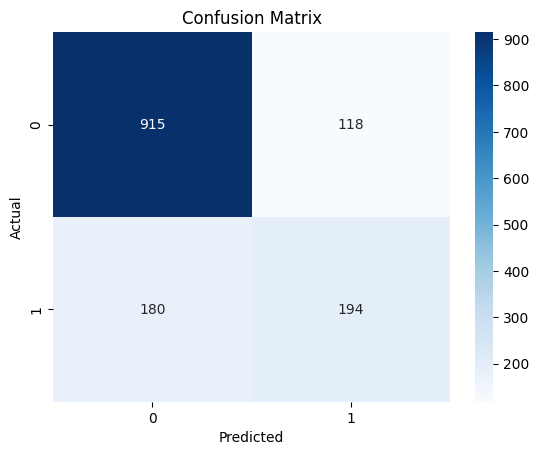

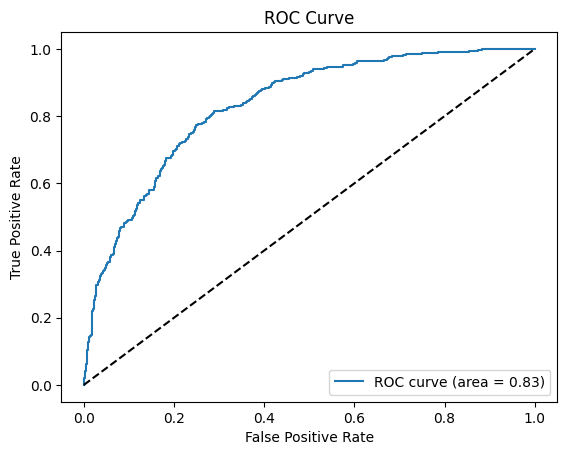

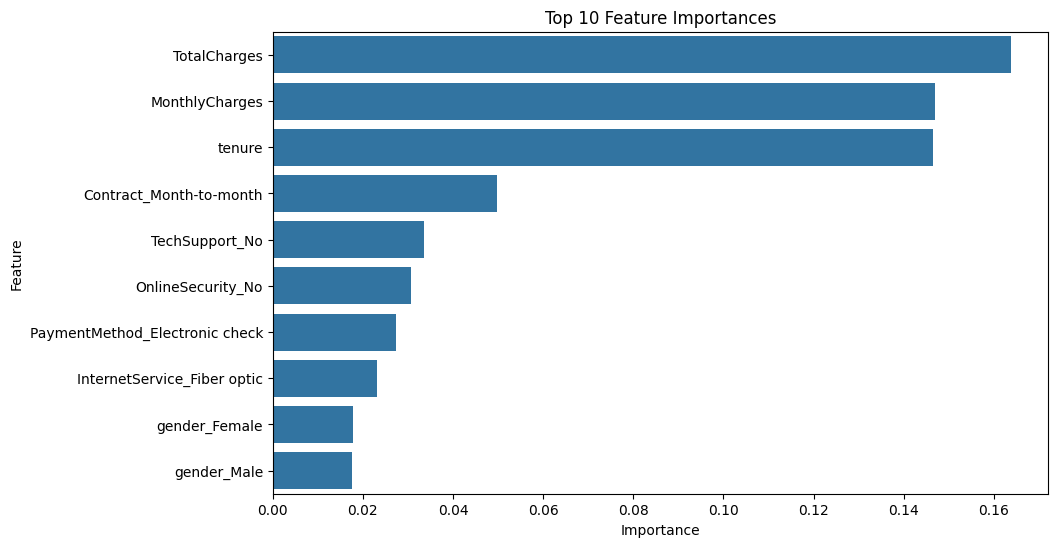

In [ ]:
#
#
#Задание 10(практическая работа)
#
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

# Загрузка файла в Google Colab
from google.colab import files
uploaded = files.upload()

# Загрузка и предварительный анализ данных
import io
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

# Предобработка данных
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)
df.drop('customerID', axis=1, inplace=True)
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
X = df.drop('Churn', axis=1)
y = df['Churn']
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = X.select_dtypes(include=['object']).columns
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features), ('cat', categorical_transformer, categorical_features)])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Разработка и обучение модели
model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression())])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')

# Визуализация матрицы ошибок
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Визуализация ROC кривой
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Анализ результатов и визуализация
model_rf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier(random_state=42))])
model_rf.fit(X_train, y_train)
importances = model_rf.named_steps['classifier'].feature_importances_
feature_names = numeric_features + model_rf.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features).tolist()
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importances')
plt.show()

In [ ]:
#
#
# Домашняя работа № 11

### Краткое техническое задание (ТЗ)

**1. Наименование программы:**
Прогнозирование ухода клиентов телекоммуникационной компании

**2. Назначение и цели создания программы:**
Программа предназначена для прогнозирования вероятности ухода клиентов телекоммуникационной компании на основе исторических данных. Цель — помочь компании предпринять превентивные меры для сохранения клиентов.

**3. Требования к программе:**

**3.1. Функциональные требования:**
- Загрузка и предварительный анализ данных.
- Предобработка данных (обработка пропущенных значений, кодирование категориальных признаков, масштабирование числовых признаков).
- Разработка и обучение модели машинного обучения.
- Оценка качества модели.
- Визуализация результатов (матрица ошибок, ROC-кривая, важность признаков).

**3.2. Нефункциональные требования:**
- Программа должна быть реализована на языке Python.
- Использование библиотек Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn.
- Программа должна быть легко адаптируема для работы с другими датасетами.

**3.3. Требования к составу и параметрам технических средств:**
- Компьютер с установленной операционной системой Windows, Linux или macOS.
- Python 3.x.
- Установленные библиотеки Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn.

**3.4. Требования к информационной и программной совместимости:**
- Программа должна быть совместима с библиотеками, указанными в п. 3.3.

**3.5. Требования к маркировке и упаковке:**
- Программа должна быть упакована в виде исходного кода на GitHub.

**3.6. Требования к транспортированию и хранению:**
- Программа должна храниться в репозитории GitHub.

**3.7. Специальные требования:**
- Программа должна быть документирована с использованием комментариев в коде и README файла.

### Оценка стоимости проекта по методике COCOMO II

**1. Оценка размера проекта (SLOC — Source Lines of Code):**
- Предположим, что написанный код содержит около 100 строк кода (SLOC).

**2. Оценка трудозатрат (Effort):**
- Используем формулу COCOMO II для оценки трудозатрат:
  \[
  \text{Effort} = A \times (SLOC/1000)^B \times \text{SF}
  \]
  где:
  - \( A = 2.94 \) (для разработки программного обеспечения)
  - \( B = 1.12 \) (для полуэмпирического проекта)
  - \( \text{SF} \) — факторы масштаба (Scale Factors)

**3. Факторы масштаба (SF):**
- Предположим, что все факторы масштаба равны 1 (средний уровень).

**4. Расчет трудозатрат:**
\[
\text{Effort} = 2.94 \times (100/1000)^{1.12} \times 1 = 2.94 \times 0.1^{1.12} \approx 0.294 \text{ человеко-месяца}
\]

**5. Оценка сроков реализации (Duration):**
- Используем формулу для оценки сроков реализации:
  \[
  \text{Duration} = 3.67 \times (\text{Effort})^{0.28 + 0.2 \times (B - 1.01)}
  \]
  \[
  \text{Duration} = 3.67 \times (0.294)^{0.28 + 0.2 \times (1.12 - 1.01)} \approx 3.67 \times 0.294^{0.302} \approx 1.2 \text{ месяца}
\]

**6. Оценка стоимости проекта:**
- Предположим, что средняя стоимость одного человеко-месяца составляет 50 000 рублей.
\[
\text{Cost} = \text{Effort} \times \text{Cost per month} = 0.294 \times 50 000 \approx 14 700 \text{ рублей}
\]

### Смета проекта

| Статья расходов               | Сумма (руб.) |
|-------------------------------|--------------|
| Трудозатраты (0.294 чел.-мес.) | 14 700       |
| Прочие расходы (10%)           | 1 470        |
| **Итого**                      | **16 170**   |

### Заключение

Проект по разработке программы для прогнозирования ухода клиентов телекоммуникационной компании оценивается в 0.294 человеко-месяца, сроки реализации составляют около 1.2 месяца, а общая стоимость проекта составляет 16 170 рублей.